<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/pr2%2Fbhj/project_3/%EB%B0%B0%ED%95%9C%EC%A7%84/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install -U kaleido

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 51s (190 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

# Import

In [1]:
# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image, display

글꼴 / 이미지 파일화 다운로드(런타임 다시시작 필요)

In [2]:
plt.rc('font', family='NanumBarunGothic') 

# Load Data

In [3]:

covid_confirmed = '/content/drive/MyDrive/data/covid/서울시 코로나19 확진자 현황.csv'
location = '/content/drive/MyDrive/data/covid/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv'

confirmed = pd.read_csv(covid_confirmed)
location = pd.read_csv(location)

In [4]:
confirmed.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


## 결측치 처리1

In [5]:
print(confirmed.확진일.value_counts())
print("------------------------------")
print(confirmed.국적.value_counts())
print("------------------------------")
print(confirmed.환자정보.value_counts())
print("------------------------------")
print(confirmed.지역.value_counts())
print("------------------------------")
print(confirmed.여행력.value_counts())
print("------------------------------")
print(confirmed.접촉력.value_counts())
print("------------------------------")
print(confirmed.조치사항.value_counts())
print("------------------------------")
print(confirmed.상태.value_counts())
print("------------------------------")
print(confirmed.이동경로.value_counts())




8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.20.      1
4.19.      1
4.18.      1
4.15.      1
1.24.      1
Name: 확진일, Length: 244, dtype: int64
------------------------------
Series([], Name: 국적, dtype: int64)
------------------------------
Series([], Name: 환자정보, dtype: int64)
------------------------------
관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     201
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      116
금천구      96
종로구      94
중구       64
종랑구       1
한국        1
Name: 지역, dtype: int64
------------------------------
미국                      153
영국                       50
필리핀                      25
인도                       13
프랑스                      13
                       ... 
프랑스 스페인 독일 이탈리아 네덜란드      1
호주 인도네시아                  1
포르투칼                      1
미

['국적', '환자정보' ,'조치사항', '이동경로']  은 모두 결측치이므로 drop column  <br/> 
등록일 수정일 노출여부 또한 필요 없는 데이터 이므로 drop

In [6]:
confirmed = confirmed.drop(['국적', '환자정보' ,'조치사항', '이동경로','등록일','수정일','노출여부'], axis=1)

In [7]:
confirmed.head()

,연번,확진일,환자번호,지역,여행력,접촉력,상태
0,5748,10.21.,25530,양천구,NaN,감염경로 조사중,NaN
1,5747,10.21.,25528,강동구,NaN,강남서초 지인모임,NaN
2,5746,10.21.,25525,강남구,NaN,기타 확진자 접촉,NaN
3,5745,10.21.,25517,관악구,NaN,감염경로 조사중,NaN
4,5744,10.21.,25504,관악구,NaN,기타 확진자 접촉,NaN


In [8]:
location

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


# Data Analysis(시각화)

## bar graph 시각화(column value count to bar graph)


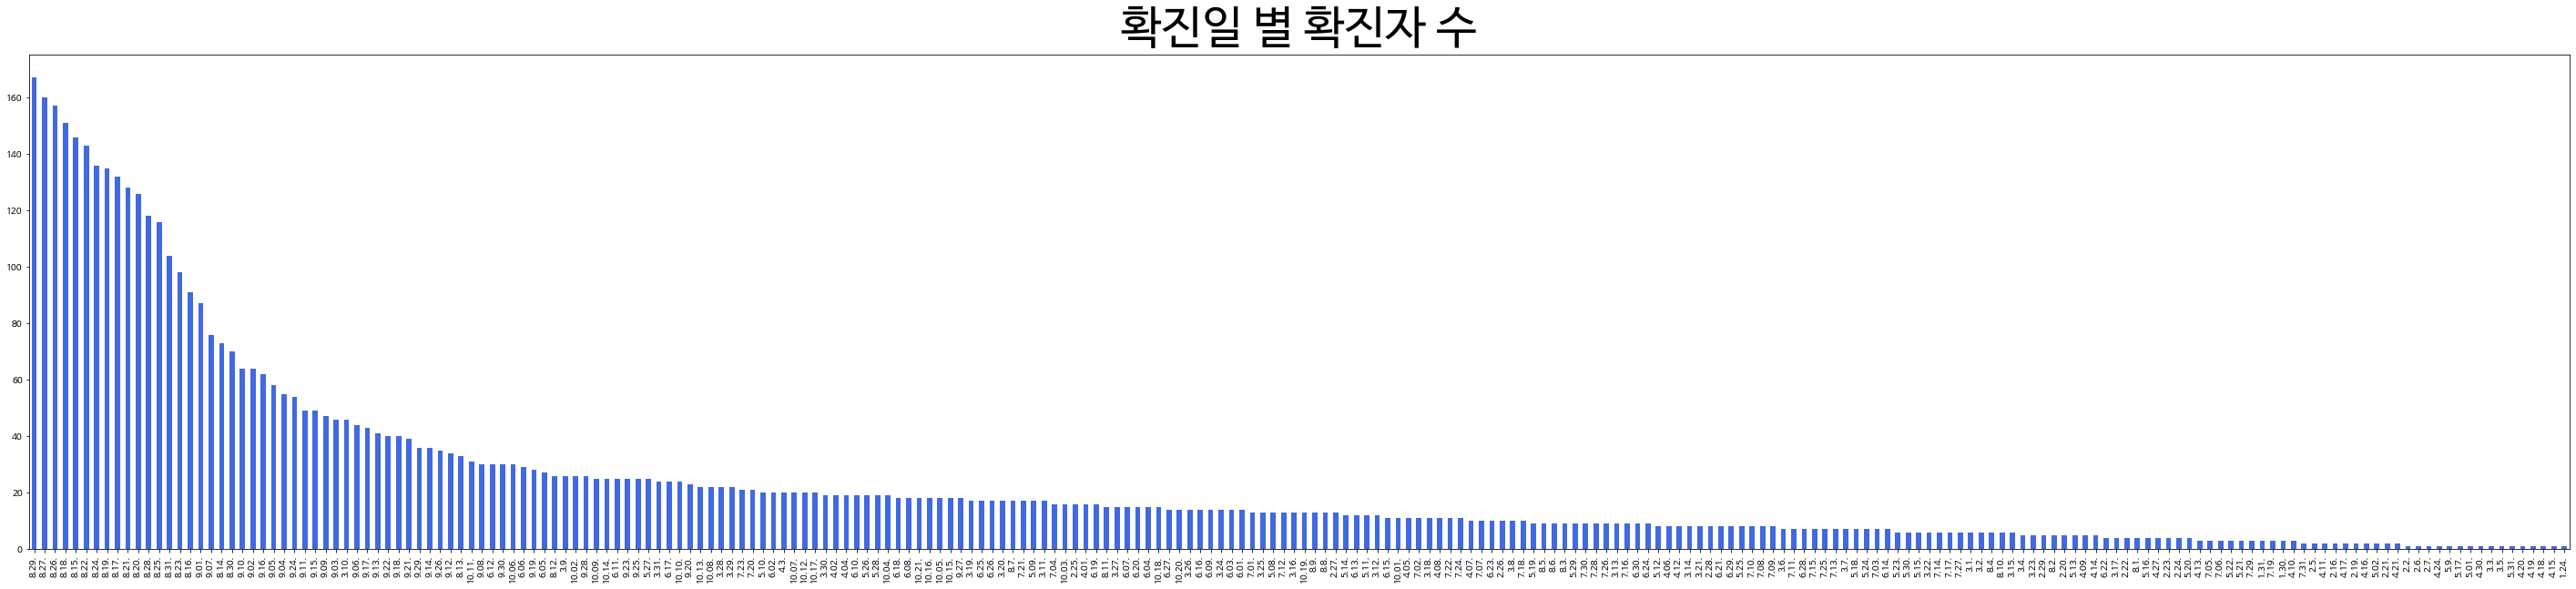

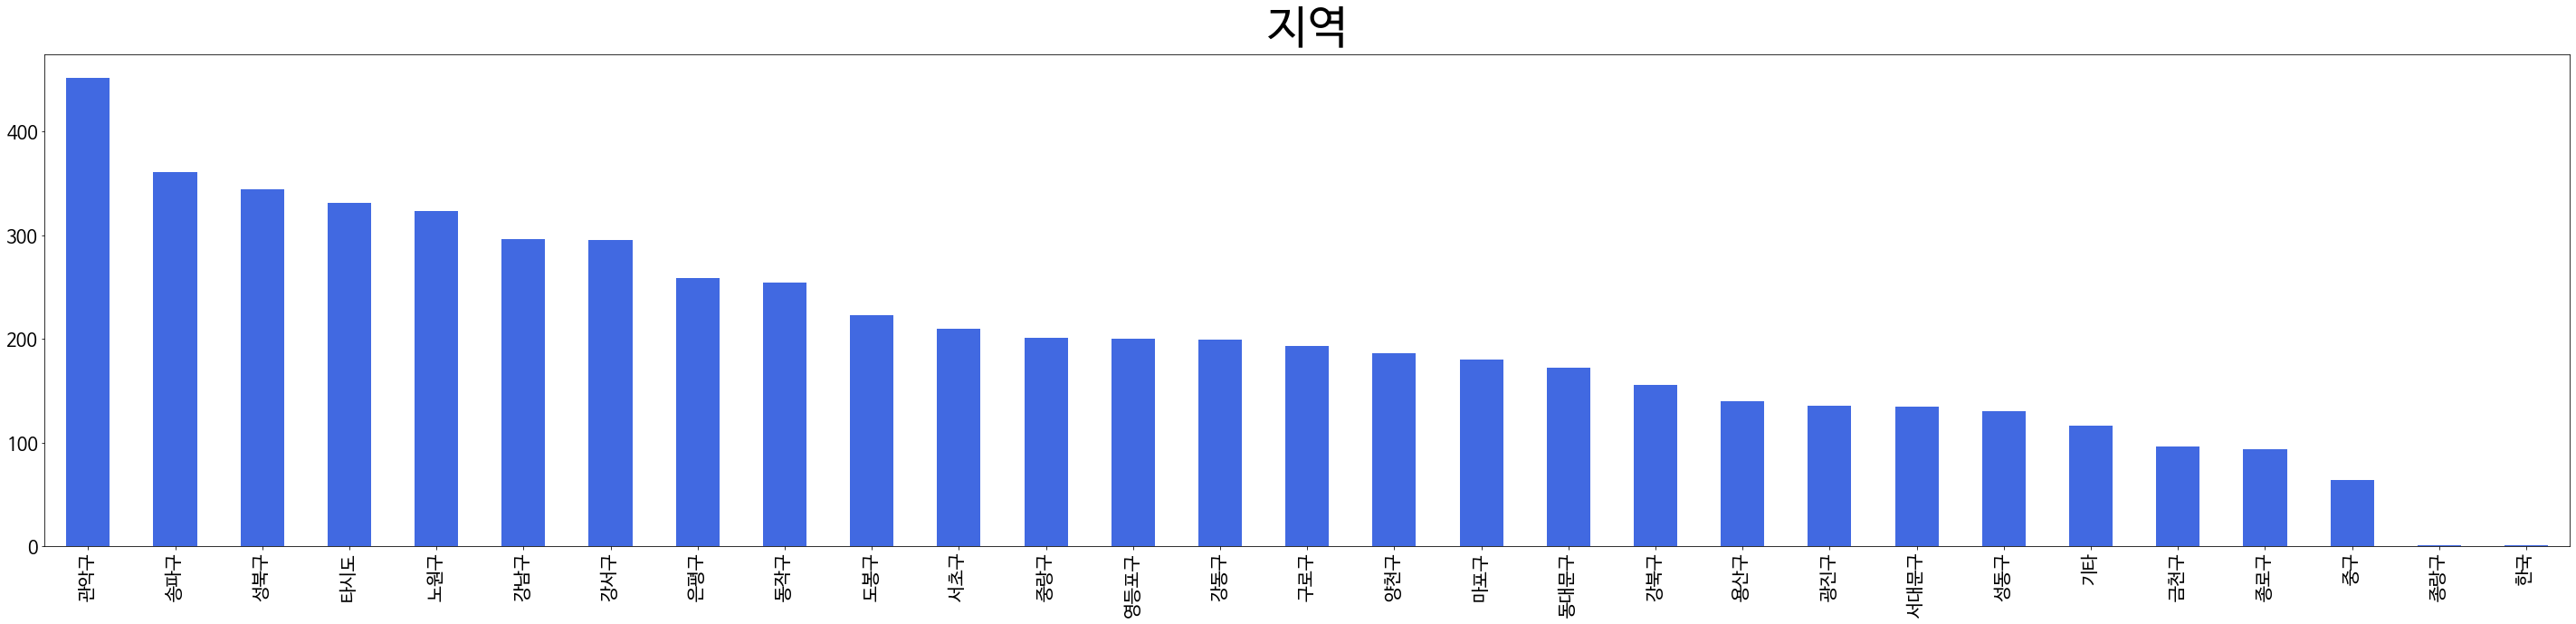

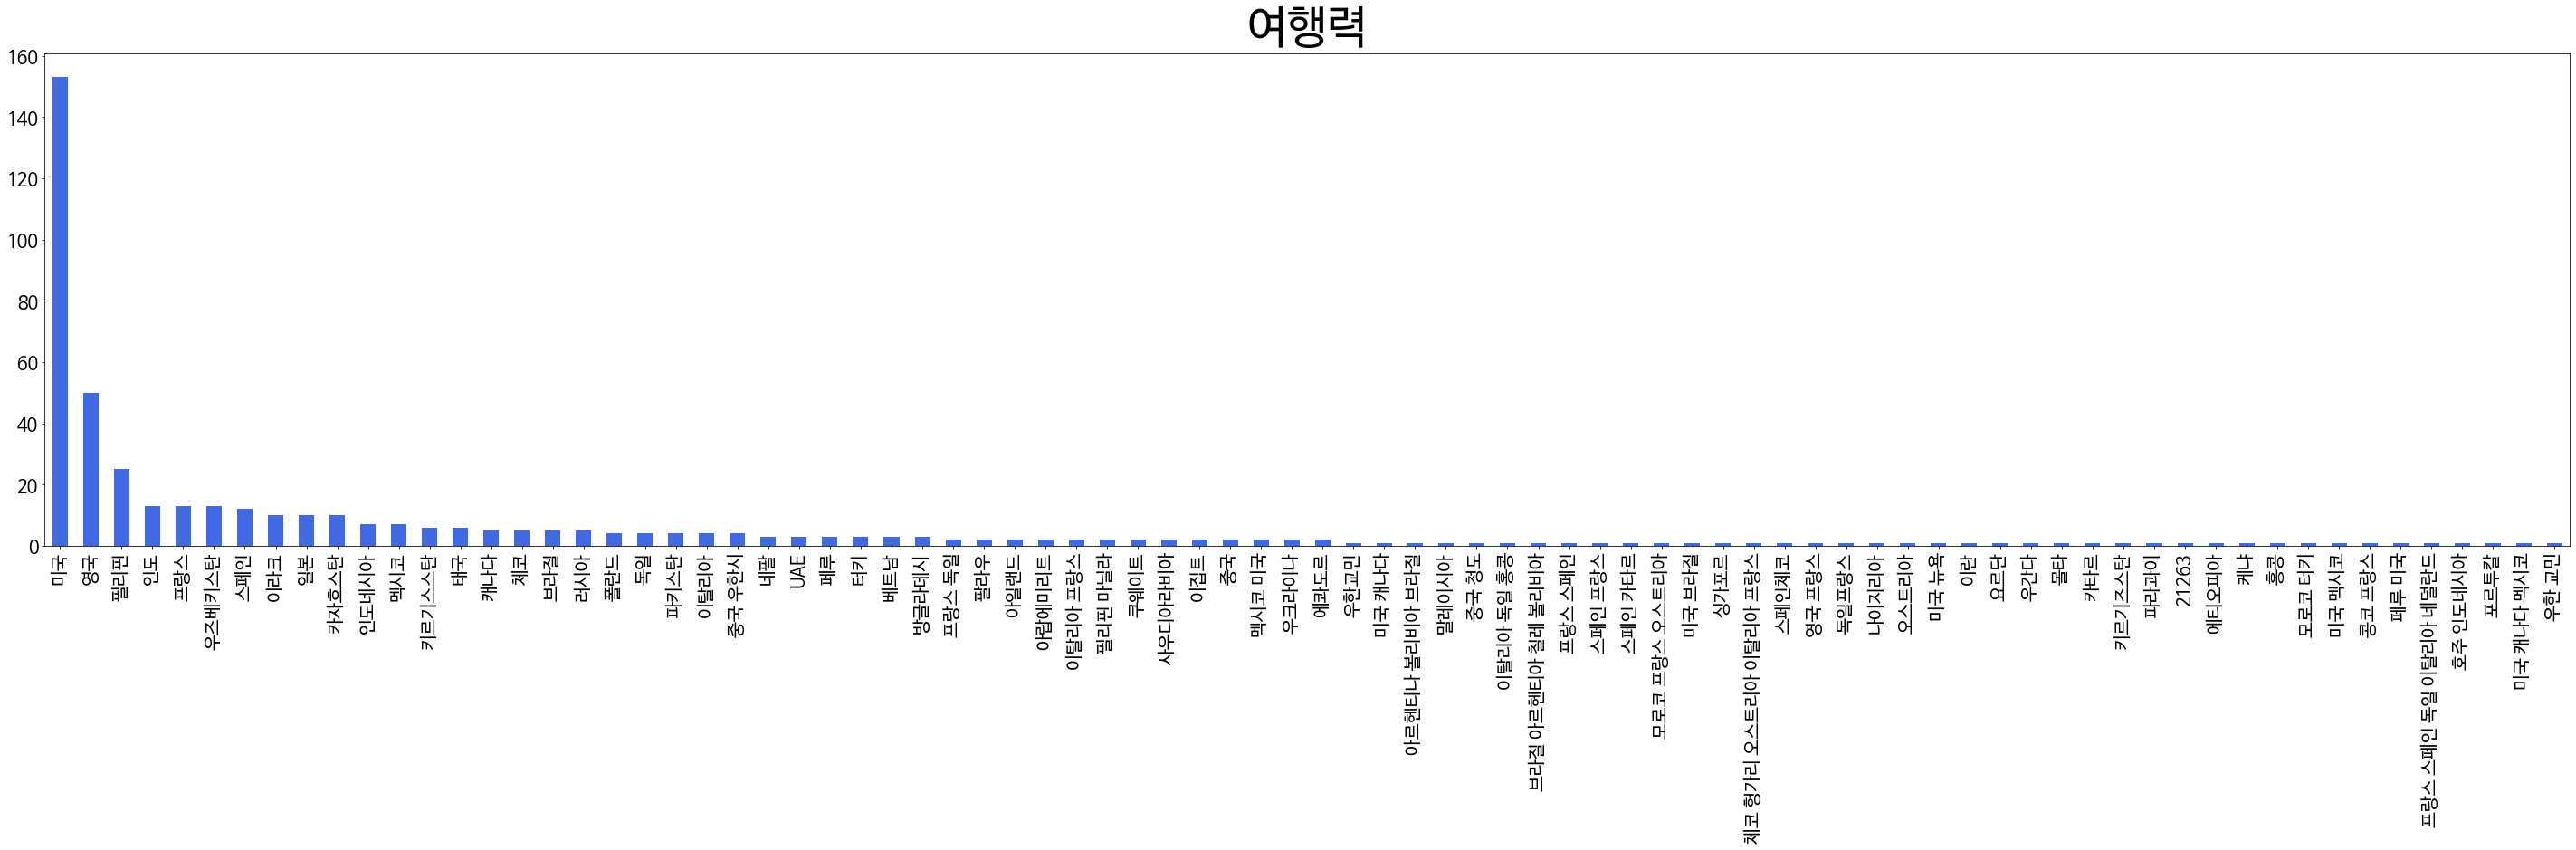

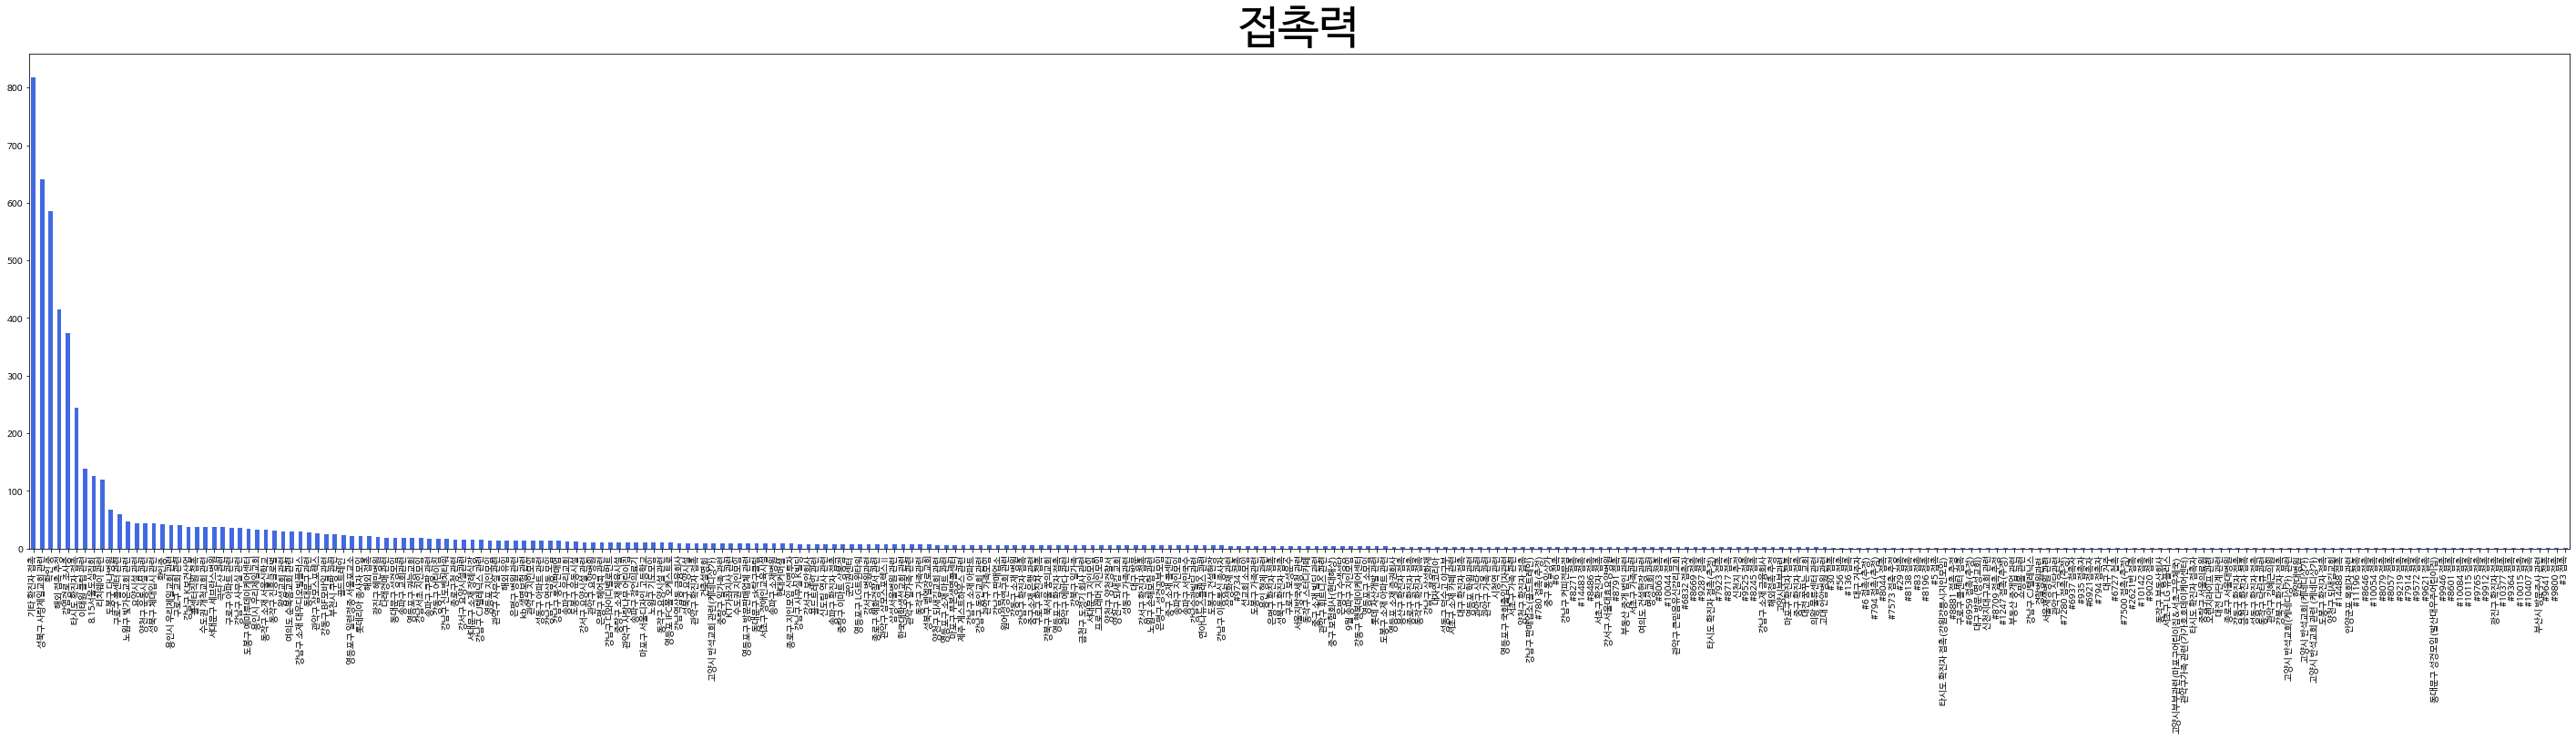

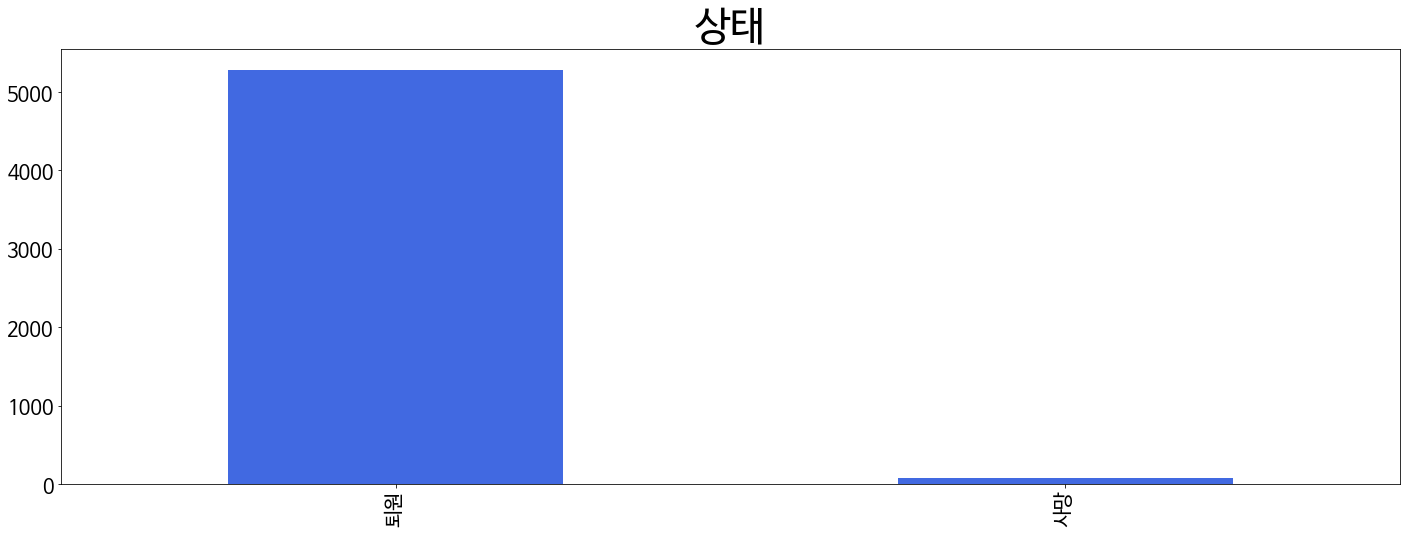

In [9]:
plt.rc('font', family='NanumBarunGothic') 

figsize = (50,10)
title_font_size = 50
fontsize1 = 10
fontsize2 = 20
color = 'royalblue'
confirmed.확진일.value_counts().plot(kind='bar', figsize = figsize, color = color, fontsize= fontsize1)
plt.title('확진일 별 확진자 수', fontsize=title_font_size)
plt.show()

confirmed.지역.value_counts().plot(kind='bar', figsize = figsize, color = color, fontsize = fontsize2)
plt.title('지역', fontsize=title_font_size)
plt.show()




confirmed.여행력.value_counts().plot(kind='bar', figsize= figsize, color = color, fontsize = fontsize2)
plt.title('여행력', fontsize=title_font_size)
plt.show()




confirmed.접촉력.value_counts().plot(kind='bar', figsize = figsize, color = color,fontsize = fontsize1)
plt.title('접촉력', fontsize=title_font_size)
plt.show()

confirmed.상태.value_counts().plot(kind='bar', figsize = (24,8), color = color,fontsize = fontsize2)
plt.title('상태', fontsize=40)

plt.show()

## 지역별 확진자 지도(choropleth)

In [10]:
import folium
import json

### 결측치 처리2

지도에 라벨이 한국이라고 되어 있는 부분의 좌표를 (0,0) 으로 리턴

In [11]:
geo_path = '/content/drive/MyDrive/data/covid/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

def add1(valid):

    loc = location[location['시군구명_한글'] == valid]['경도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]
    
def add2(valid):
    loc = location[location['시군구명_한글'] == valid]['위도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]

confirmed['경도'] = confirmed.apply(lambda row : add1(row['지역']), axis = 1)

confirmed['위도'] = confirmed.apply(lambda row : add2(row['지역']), axis = 1)

In [12]:
df = pd.DataFrame(confirmed.지역.value_counts(dropna=False))


df = df.reset_index()
df.columns = ['장소','확진자수']
df

,장소,확진자수
0,관악구,452
1,송파구,361
2,성북구,344
3,타시도,331
4,노원구,323
5,강남구,296
6,강서구,295
7,은평구,259
8,동작구,254
9,도봉구,223


### choropleth map plot

In [13]:
# map = folium.Map(location=[37.5545660680291,127.04672806823502], 
#                  zoom_start=10,
#                  zoom_control=False,
#                scrollWheelZoom=False,
#                dragging=False)

# map.choropleth(geo_data = geo_json,
#                data = df,
#                fill_color = 'BuPu',
#                columns = ['장소','확진자수'],
#                key_on = 'feature.properties.name',
#                fill_opacity=0.7,
#                line_opacity=0.2,

#                highlight=True,
# )

            
# map

In [14]:
import plotly.express as px
import pandas as pd 
import os 



In [15]:


fig = px.choropleth(df, geojson=geo_json, locations='장소', color='확진자수',
                           color_continuous_scale="Blues",
                          featureidkey='properties.name'
                          
                          )

fig.update_geos(fitbounds="locations", visible=False)

fig.write_image("fig1.png")

fig.show()

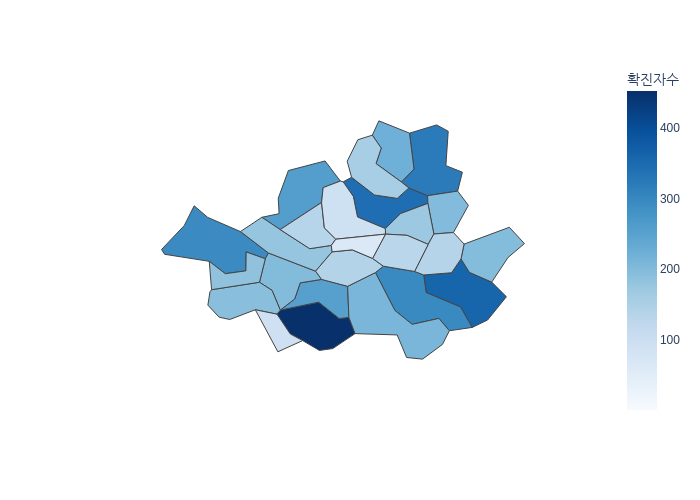

In [16]:
Image(filename='fig1.png') 

## 월별 확진자 수

In [17]:
# month 열 생성


confirmed['month'] = confirmed.apply(lambda row : row['확진일'].split('.')[0], axis = 1)

In [18]:
confirmed['month']

0       10
1       10
2       10
3       10
4       10
        ..
5743     1
5744     1
5745     1
5746     1
5747     1
Name: month, Length: 5748, dtype: object

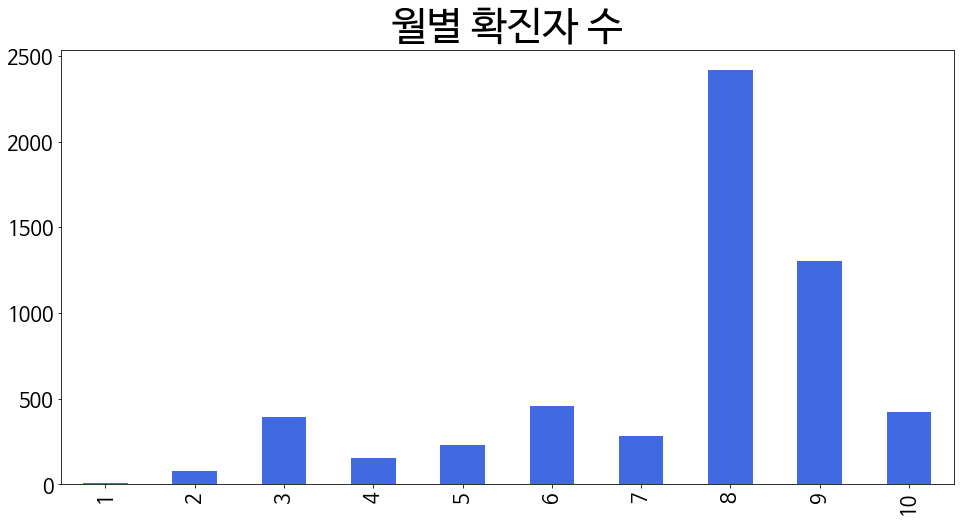

In [19]:
figsize = (16,8)
title_font_size = 40
month_df = confirmed.month.value_counts()
month_index = confirmed.month.value_counts().index.tolist()
month_index = map(int,month_index)
month_df.index = month_index
month_df  =month_df.sort_index()
month_df.plot(kind='bar', figsize = figsize, color = 'royalblue', fontsize = 20)
plt.title('월별 확진자 수', fontsize=title_font_size)
plt.show()

## 여행객과 전체 확진자수

### 가설

가설: 확진자수에서 여행자수는 큰 비중을 차지하지 않을 것이다.

### plot graph

In [20]:
# 여행여부 열 추가
import math
def is_null(value):
  if type(value) == str:
    return True
  else:
    return False
confirmed['여행여부'] = confirmed.apply(lambda row : is_null(row['여행력']), axis = 1)

In [21]:
confirmed['여행여부']

0       False
1       False
2       False
3       False
4       False
        ...  
5743    False
5744     True
5745    False
5746     True
5747     True
Name: 여행여부, Length: 5748, dtype: bool

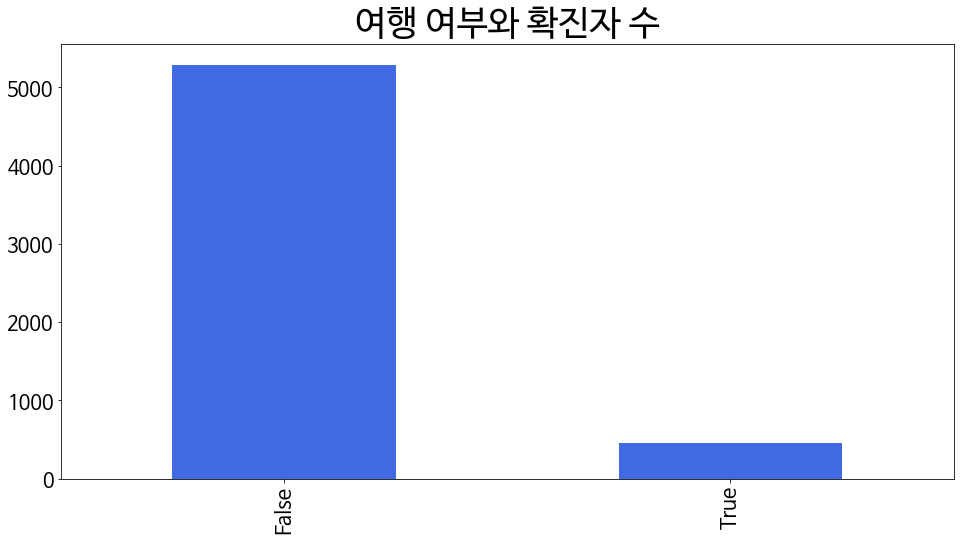

In [22]:
figsize = (16,8)
title_font_size = 35
confirmed.여행여부.value_counts().plot(kind='bar', figsize = figsize, color = 'royalblue', fontsize = 20)
plt.title('여행 여부와 확진자 수', fontsize=title_font_size)
plt.show()

### 분석

전체 여행객 수와 확진자 비율 관계가 신뢰성이 있을 듯

In [23]:
confirmed.head()

,연번,확진일,환자번호,지역,여행력,접촉력,상태,경도,위도,month,여행여부
0,5748,10.21.,25530,양천구,NaN,감염경로 조사중,NaN,126.856153,37.527062,10,False
1,5747,10.21.,25528,강동구,NaN,강남서초 지인모임,NaN,127.146482,37.549208,10,False
2,5746,10.21.,25525,강남구,NaN,기타 확진자 접촉,NaN,127.066409,37.495985,10,False
3,5745,10.21.,25517,관악구,NaN,감염경로 조사중,NaN,126.943807,37.465399,10,False
4,5744,10.21.,25504,관악구,NaN,기타 확진자 접촉,NaN,126.943807,37.465399,10,False


## 지역과 월별 확진자수의 상관관계(seaborn heatmap)

### 가설

가설: 지역과 월별 확진자수를 분석하면 월별로 집중된 지역이 있을 것이다.

### plot heatmap

In [162]:
class1 = confirmed['month'].unique().tolist()
class2 = confirmed['지역'].unique().tolist()

matrix = [[0]*len(class2) for _ in range(len(class1))]


for i in range(len(confirmed.index)):
  get = confirmed.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix[month][loc] += 1


In [164]:
len(matrix)

10

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



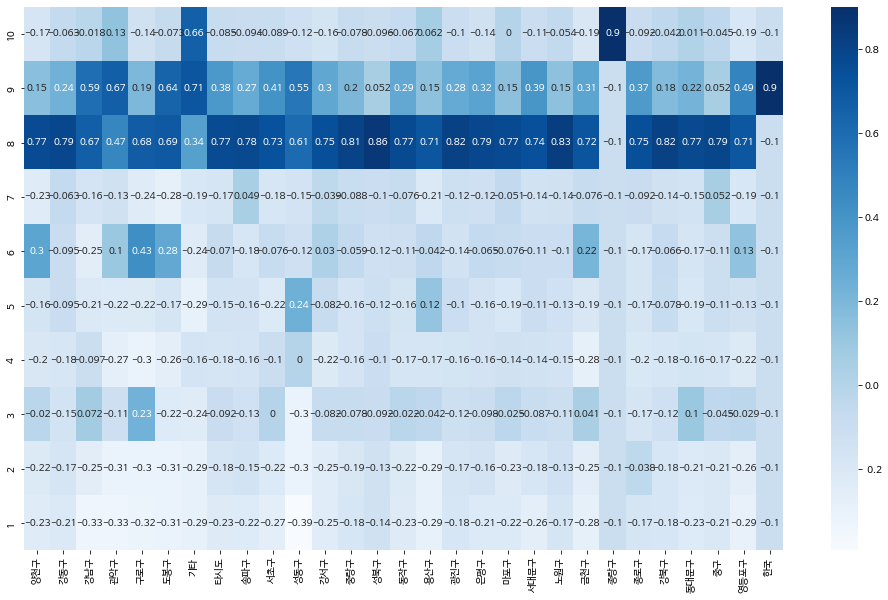

In [165]:
import seaborn as sn

# 열별(월별) 정규화
def mean_norm(df_input):
    return df_input.apply(lambda x: (x/ x.max()), axis=0)

matrix2 = pd.DataFrame(matrix)

matrix2.index = [i for i in class1]
matrix2.columns = [i for i in class2]

matrix2 = matrix2.apply(lambda x: (x - x.mean())/ x.max(), axis=0)
plt.figure(figsize = (17,10))
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(matrix2, annot=True, cmap = 'Blues')

### 분석

분석: 
월별로 집중된 지역은 존재하나 고르게 퍼진 지역일수록 확진자수가 높은 것으로 보인다.

## 월별 지역별 확진자 지도(choropleth)

### 가설

가설: 지역 집중도에 따른 확진자수의 특성이 있을 것이다.

### plot choropleth

In [167]:
class1 = confirmed['month'].unique().tolist()
class2 = confirmed['지역'].unique().tolist()

matrix_image = [[0]*len(class1) for _ in range(len(class2))]


for i in range(len(confirmed.index)):
  get = confirmed.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix_image[loc][month] += 1

image_list = []
for i in range(1,11):
  month = str(i)

  matrix3 = pd.DataFrame(matrix_image)
  matrix3.index = [i for i in class2]
  matrix3.columns = [i for i in class1]
  df_in = pd.DataFrame(matrix3[month])
  df_in = df_in.reset_index()
  df_in.columns = ['장소','확진자수']
  df_in
  fig = px.choropleth(df_in, geojson=geo_json, locations='장소', color='확진자수',
                            color_continuous_scale="Blues",
                            featureidkey='properties.name',
                            title = month + '월'
                            
                            )


  fig.update_geos(fitbounds="locations", visible=False)

  fig.write_image("mon" + month + ".png")
  image_list.append("mon" + month + ".png")

  fig.show()

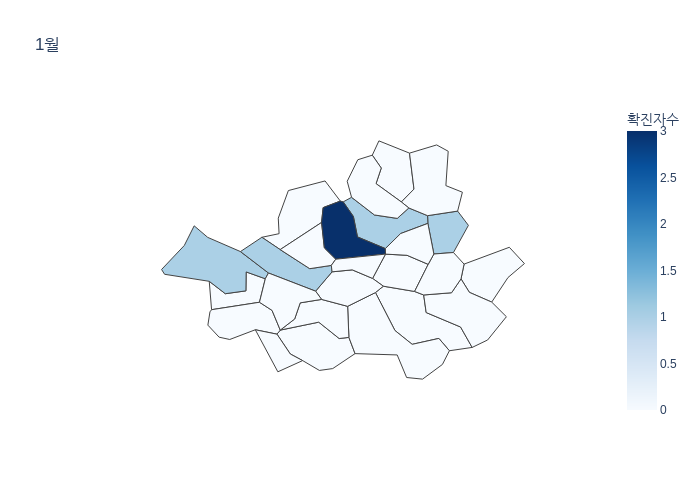

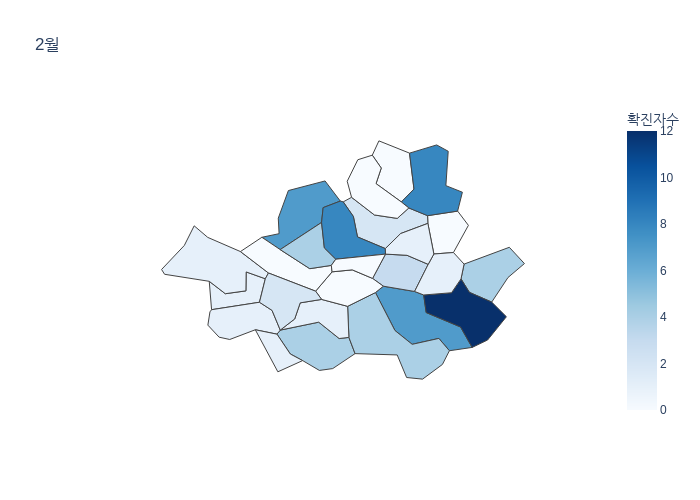

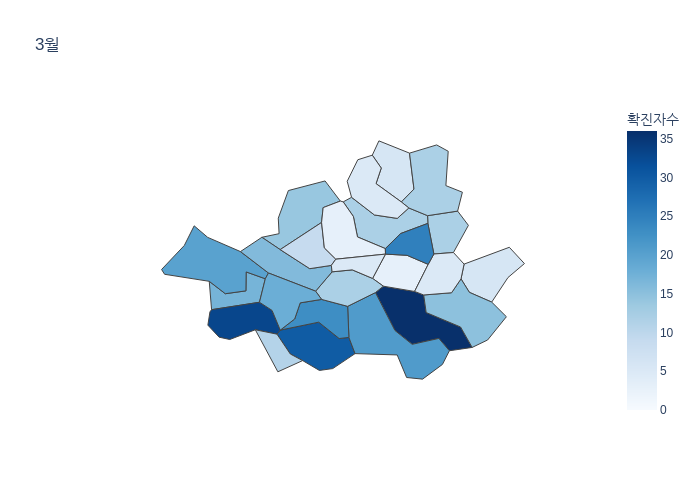

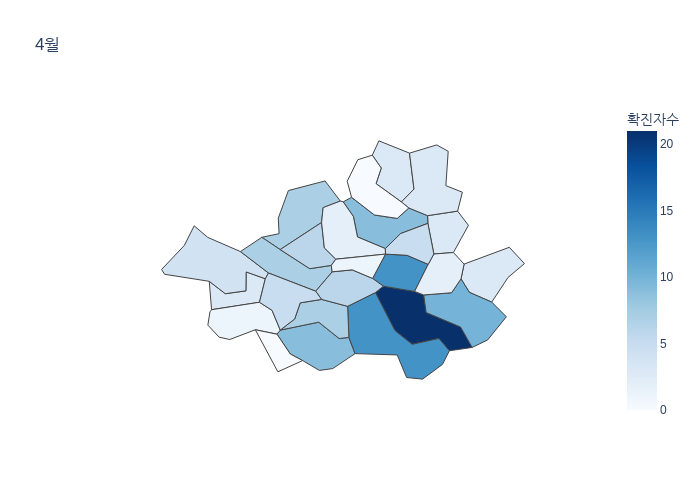

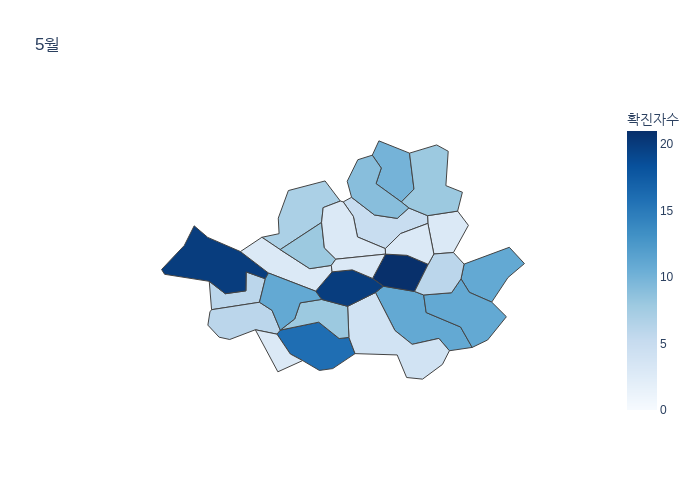

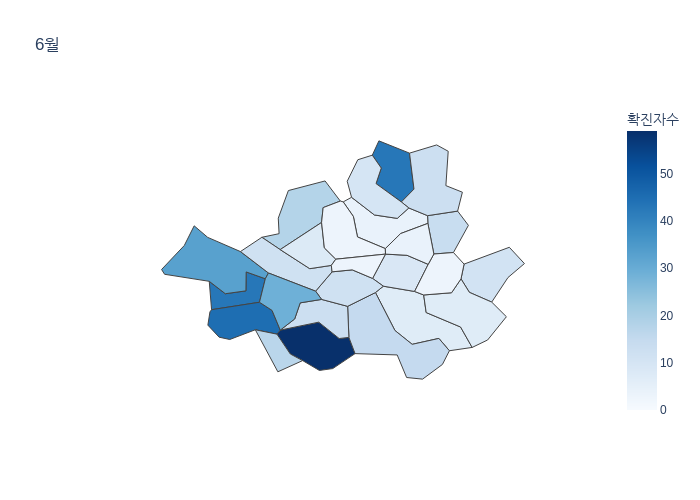

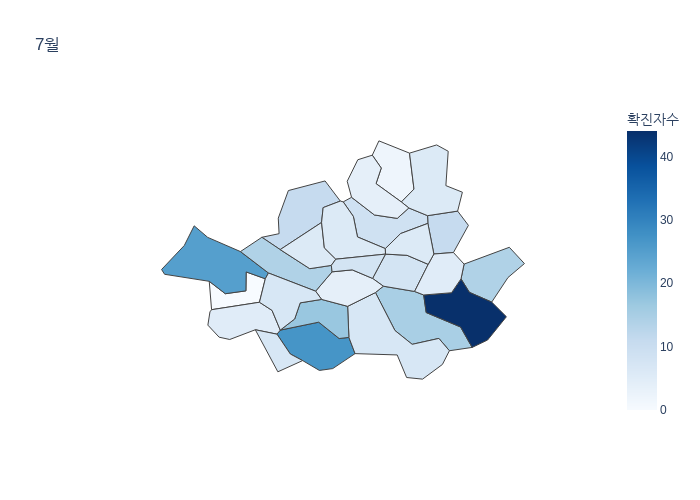

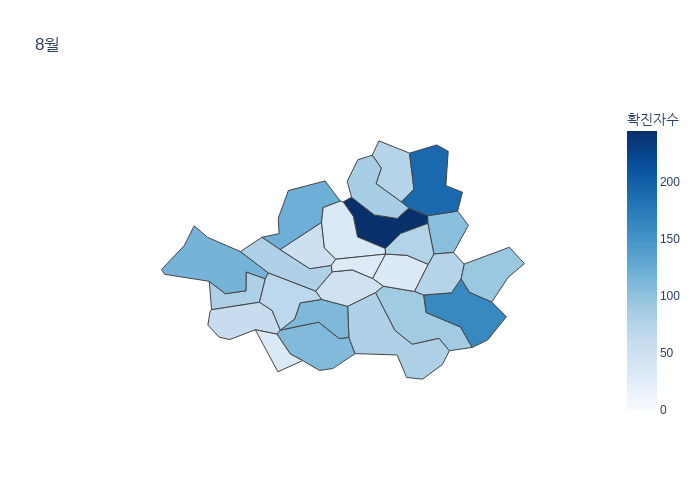

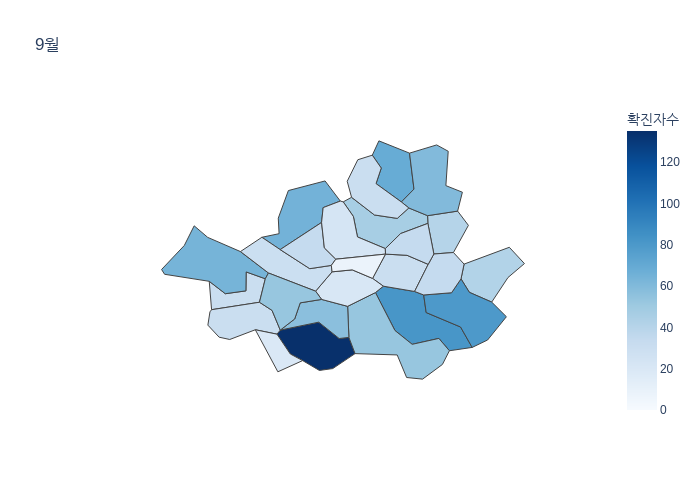

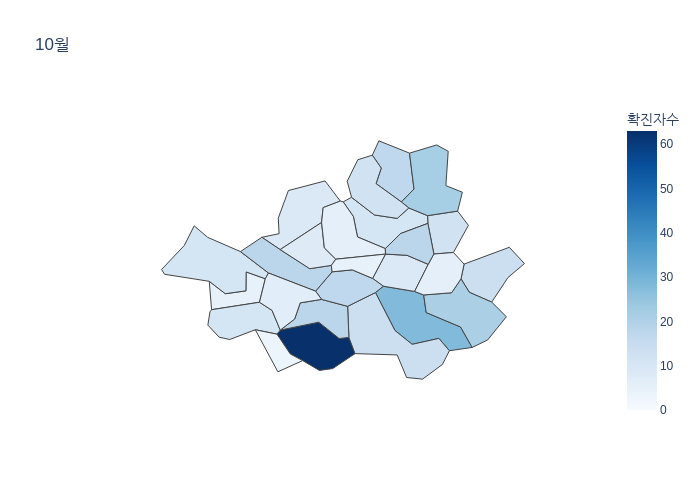

In [30]:
for imageName in image_list:
    display(Image(filename=imageName))

### 분석

분석: 대략적으로 보았을때 넓게 분포 확진 지역이 한쪽에 집중 되지 않고 넓게 퍼져있을 수록 확진자 수 자체가 높은 경향이 있음  <br/>
(원인과 결과의 우선관계를 파악하기는 어려움)

## 지역별 확진자수의 표준편차와 확진자수 관계

### 가설

가설: 넓은 지역에 고르게 확진자가 있을수록 전체 확진자수가 많아질 것이다.

x축: 표준편차*100/평균(상대 표준편차 RDS)  <br/>
y축: 확진자수

표준편차가 높을수록 확진자수가 낮아지므로 반비례하는 산점도가 표현될 것

### plot graph

In [121]:
class1 = confirmed['month'].unique().tolist()
class2 = confirmed['지역'].unique().tolist()

matrix_std = [[0]*len(class2) for _ in range(len(class1))]


for i in range(len(confirmed.index)):
  get = confirmed.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix_std[month][loc] += 1


In [159]:
import seaborn as sn

# 열별(월별) 정규화
# def mean_norm(df_input):
#     return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

matrix3 = pd.DataFrame(matrix_std)

std_up = pd.DataFrame(matrix3.apply(lambda x: x.std()*100/x.mean(), axis = 1),columns = ['std'])

matrix3.index = [i for i in class1]
matrix3.columns = [i for i in class2]

std_up['sum'] = matrix3.apply(lambda x: x.sum(), axis = 1).tolist()
std_up.sort_values(by=['std'])
std_up

,std,sum
0,84.898916,425
1,63.367918,1304
2,64.909986,2416
3,95.511570,281
4,96.448636,460
5,74.377538,228
6,88.236794,156
7,72.089976,391
8,118.914829,80
9,263.304854,7


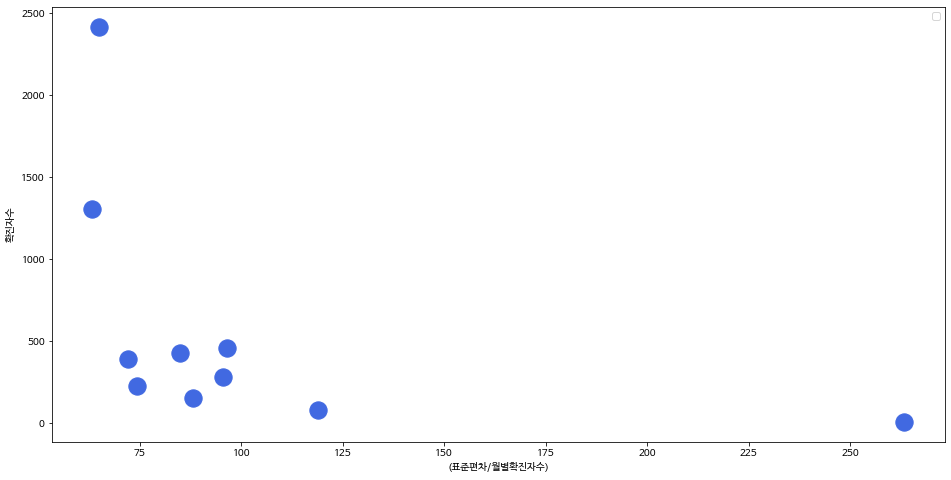

In [160]:
x_list = std_up['std'].to_numpy()
# print(x_list)
y_list = std_up['sum'].to_numpy()
# print(y_list)
plt.figure(figsize = (16,8))
plt.scatter(x_list, y_list, s=300, color = 'royalblue')
plt.xlabel('(표준편차/월별확진자수)')
plt.ylabel('확진자수')

plt.legend()
plt.show()

### 분석

결과적으로 표준편차가 낮을수록 확진자수가 높아지는 반비례 그래프가 그려짐  <br/>
지역별로 고르게 확진자가 분포할수록 확진자수가 커짐을 확인함

## 월별 여행자수와 확진자수의 상관관계

### 가설

기준 수치
* y축: (월별 확진자수)/(월별 여행자수) => 여행자 확진자 비례상수
* x축: (월별 여행자수)
* 가설: 월별 여행자수가 커질수록 여행자 확진자 비례상수가 커질 것이다

### plot graph

In [71]:
mt = confirmed[['month','여행여부']]

# month = '1'

p_num = pd.DataFrame(mt['month'].value_counts()).sort_index()
p_index = map(int,p_num.index.tolist())
p_num.index = p_index

p_num = p_num.sort_index()
p_num.columns = ['확진자수']

p_num['여행자수'] = 0


def find_travel(value):
  val_mon = int(value['month']) -1
  val_tf = value['여행여부']
  if val_tf == False:
    val_tf = 0
  else:
    val_tf = 1

  p_num[val_mon:val_mon+1]['여행자수'] += val_tf


mt.apply(lambda row : find_travel(row), axis = 1)
p_num.sort_values(by='여행자수')
p_num['y'] = p_num.apply(lambda row: int(row['확진자수']/row['여행자수']), axis = 1)
p_num

,확진자수,여행자수,y
1,7,3,2
2,80,11,7
3,391,132,2
4,156,113,1
5,228,24,9
6,460,24,19
7,281,39,7
8,2416,51,47
9,1304,23,56
10,425,39,10


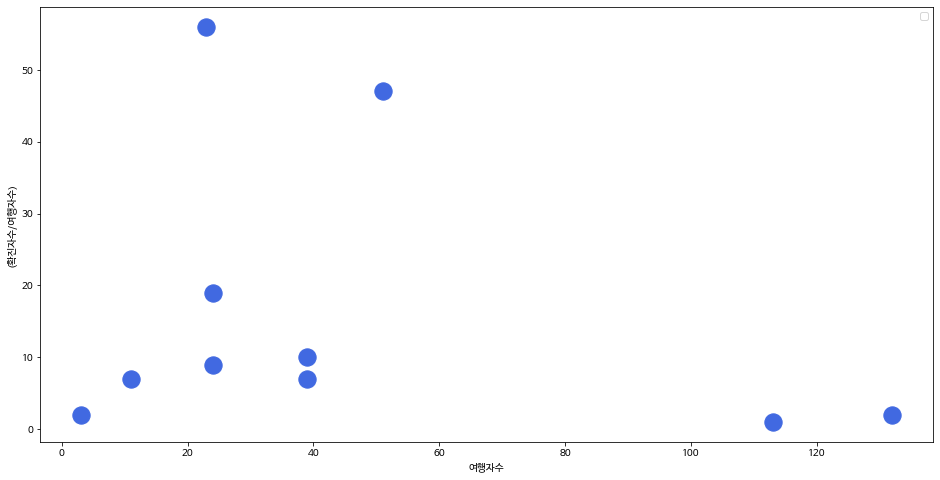

In [81]:
x_list = p_num['여행자수'].to_numpy()
# print(x_list)
y_list = p_num['y'].to_numpy()
# print(y_list)
plt.figure(figsize = (16,8))
plt.scatter(x_list, y_list, s=300, color = 'royalblue')
plt.xlabel('여행자수')
plt.ylabel('(확진자수/여행자수)')

plt.legend()
plt.show()

### 분석

결론: 상관관계가 있다면 산점도 그래프가 비례 관계를 보였겠지만 그렇지 않았다. <br/>
그러므로 (확진자수/여행자수) 와 여행자수의 상관관계는 없다고 볼 수 있다. 